In [9]:
import cv2
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [10]:
car_frame = os.listdir('cars_frame')

In [11]:
car_frame[:10]

['0.png',
 '1.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '109.png',
 '110.png',
 '114.png',
 '115.png']

In [12]:
car_frame.sort(key=lambda f:int(re.sub('\D','',f)))

In [14]:
car_frame[:10]

['0.png',
 '1.png',
 '2.png',
 '3.png',
 '7.png',
 '8.png',
 '9.png',
 '13.png',
 '14.png',
 '15.png']

In [20]:
col_img_path = []
for i in car_frame:
    img = cv2.imread('cars_frame/'+i)
    col_img_path.append(img)

In [23]:
col_img_path[0]

array([[[188, 176, 169],
        [225, 213, 206],
        [225, 213, 206],
        ...,
        [230, 230, 230],
        [230, 230, 230],
        [190, 190, 190]],

       [[206, 194, 187],
        [247, 235, 228],
        [246, 234, 227],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [210, 210, 210]],

       [[206, 194, 187],
        [248, 236, 229],
        [247, 235, 228],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [210, 210, 210]],

       ...,

       [[ 85,  85,  85],
        [109, 109, 109],
        [115, 115, 115],
        ...,
        [ 54,  51,  52],
        [ 45,  45,  45],
        [ 35,  35,  35]],

       [[ 83,  83,  83],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 73,  69,  69],
        [ 55,  55,  56],
        [ 40,  40,  40]],

       [[ 59,  59,  59],
        [ 65,  65,  65],
        [ 65,  65,  65],
        ...,
        [ 73,  69,  69],
        [ 65,  65,  65],
        [ 45,  45,  45]]

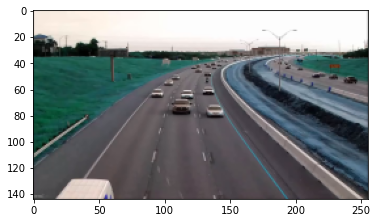

In [24]:
plt.imshow(col_img_path[0])

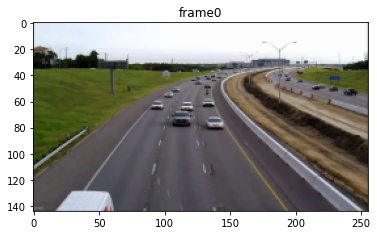

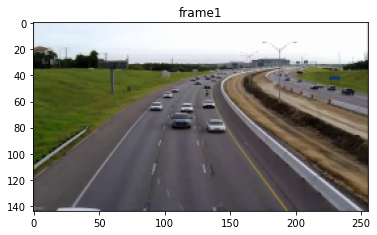

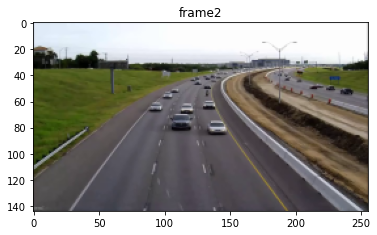

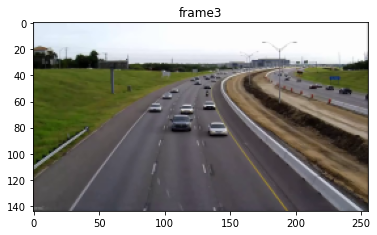

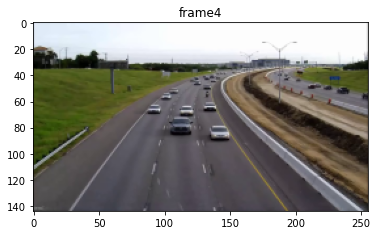

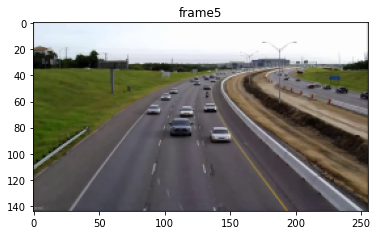

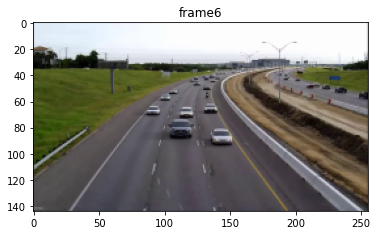

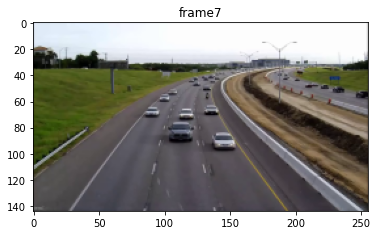

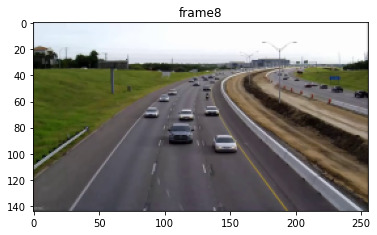

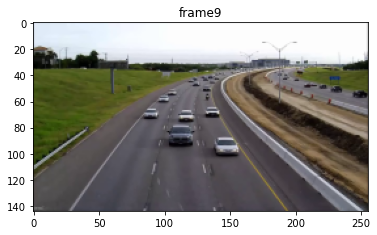

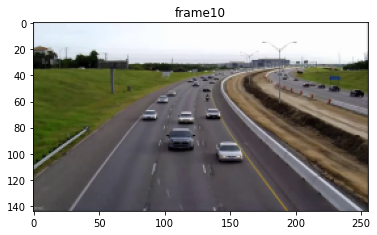

In [25]:
count = 10
for frame in range(0, count+1):
    plt.imshow(cv2.cvtColor(col_img_path[frame], cv2.COLOR_BGR2RGB))
    plt.title('frame'+str(frame))
    plt.show()

## Image Difference

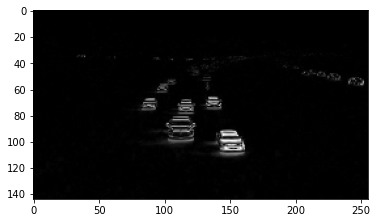

In [38]:
gray_a = cv2.cvtColor(col_img_path[10], cv2.COLOR_BGR2GRAY)
gray_b = cv2.cvtColor(col_img_path[11], cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.absdiff(gray_a, gray_b), cmap='gray')
plt.show()

## Image Threshold Difference

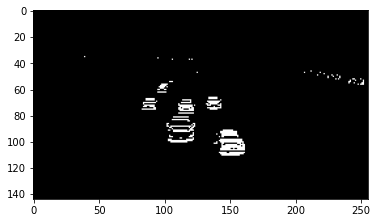

In [39]:
img_diff = cv2.absdiff(gray_a, gray_b)
ret, thresh = cv2.threshold(img_diff, 30, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()

In [40]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [41]:
kernal = np.ones((3,3), np.uint8)

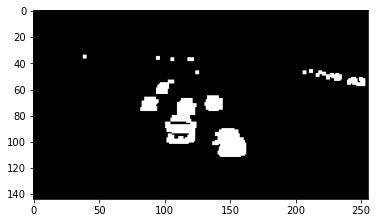

In [42]:
cleared_img = cv2.dilate(thresh, kernal, iterations=1)
plt.imshow(cleared_img, cmap='gray')
plt.show()

## Image Line

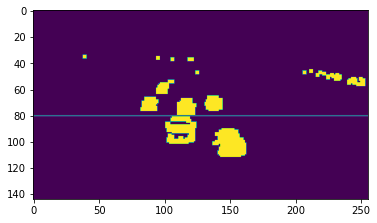

In [44]:
plt.imshow(cleared_img)
cv2.line(cleared_img, (0,120), (256,120), (100,0,0))
plt.show()

In [58]:
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [59]:
l = enumerate(contours)

In [60]:
list(l)[0]

(0,
 array([[[142, 108]],
 
        [[143, 109]],
 
        [[144, 110]],
 
        [[145, 110]],
 
        [[146, 110]],
 
        [[147, 110]],
 
        [[148, 110]],
 
        [[149, 110]],
 
        [[150, 110]],
 
        [[151, 110]],
 
        [[152, 110]],
 
        [[153, 110]],
 
        [[154, 110]],
 
        [[155, 110]],
 
        [[156, 110]],
 
        [[157, 110]],
 
        [[158, 109]],
 
        [[159, 109]],
 
        [[160, 109]],
 
        [[161, 108]],
 
        [[160, 108]],
 
        [[159, 108]],
 
        [[158, 108]],
 
        [[157, 108]],
 
        [[156, 108]],
 
        [[155, 108]],
 
        [[154, 108]],
 
        [[153, 108]],
 
        [[152, 108]],
 
        [[151, 108]],
 
        [[150, 108]],
 
        [[149, 109]],
 
        [[148, 109]],
 
        [[147, 108]],
 
        [[146, 108]],
 
        [[145, 108]],
 
        [[144, 108]],
 
        [[143, 108]]], dtype=int32))

In [62]:
valid_contours_entry = []
for i, cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_contours_entry.append(cntr)
print(len(valid_contours_entry))

5


In [63]:
data = col_img_path[13].copy()

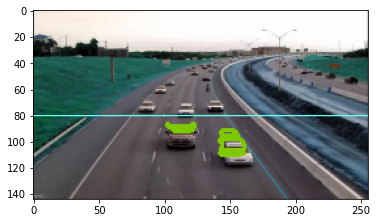

In [64]:
cv2.drawContours(data, valid_contours_entry, -1, (127,200,0),2)
cv2.line(data, (0,80), (256,80), (100,255,255))
plt.imshow(data)
plt.show()

### Vehicle Object Detection

In [69]:
kernal = np.ones((4,4), np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
pathIN = 'contour_frame/'
os.mkdir(pathIN)

for i in range(len(col_img_path)-1):
    gray_a = cv2.cvtColor(col_img_path[i], cv2.COLOR_BGR2GRAY)
    gray_b = cv2.cvtColor(col_img_path[i+1], cv2.COLOR_BGR2GRAY)
    
    diff_img = cv2.absdiff(gray_a, gray_b)
    ret, thresh = cv2.threshold(diff_img, 30, 255, cv2.THRESH_BINARY)
    dialated_img = cv2.dilate(thresh, kernal, iterations=1)
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    valid_contours_entry = []
    for i, cntr in enumerate(contours):
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                valid_contours_entry.append(cntr)
    
    data = col_img_path[i].copy()
    cv2.drawContours(data, valid_contours_entry, -1, (127, 200, 0), 2)
    cv2.putText(data, "Vehicle Detected:"+str(len(valid_contours_entry)), (55,15), font, 0.6, (0,180,0), 2)
    cv2.line(data, (0,80), (256,80), (100,255,255))
    cv2.imwrite(pathIN+str(i)+'.png', data)

In [70]:
output_video_path = 'dataset/vehicle_detected.mp4'
fps = 14.0
frame_array = []
inp_files = [file for file in os.listdir(pathIN)]

In [73]:
inp_files.sort(key = lambda f:int(re.sub('\D','',f)))

In [74]:
inp_files

['36.png',
 '38.png',
 '39.png',
 '40.png',
 '41.png',
 '42.png',
 '43.png',
 '44.png',
 '45.png',
 '46.png',
 '47.png',
 '48.png',
 '49.png',
 '50.png',
 '51.png',
 '52.png',
 '53.png',
 '54.png',
 '55.png',
 '56.png',
 '57.png',
 '58.png',
 '59.png',
 '60.png',
 '61.png',
 '62.png',
 '63.png',
 '64.png',
 '65.png',
 '66.png',
 '67.png',
 '68.png',
 '69.png',
 '70.png',
 '71.png',
 '72.png',
 '73.png',
 '75.png',
 '76.png',
 '77.png',
 '78.png',
 '79.png',
 '80.png',
 '81.png',
 '82.png',
 '83.png',
 '84.png',
 '85.png',
 '86.png',
 '87.png',
 '97.png',
 '109.png']

In [77]:
for i in range(len(inp_files)):
    filename = pathIN+inp_files[i]
    img = cv2.imread(filename)
    h, w, layers = img.shape
    size = (w,h)
    frame_array.append(img)

In [78]:
output = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    output.write(frame_array[i])
output.release()

In [82]:
video = cv2.VideoCapture('dataset/vehicle_detected.mp4')
if (video.isOpened() == False):
    print('Error in Openning Video')
while (video.isOpened()):
    res, frame = video.read()
    if res == True:
        cv2.imshow('Vehicle Detection', frame)
        if cv2.waitKey(60) & 0xff == ord('q'):
            break
    else:
        break
video.release()
cv2.destroyAllWindows()